<a href="https://colab.research.google.com/github/alpet25/twofive-twentyfive/blob/main/PYIM_Assign_4_PYIM009ONL005_Alfapetra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.4.3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

import pathlib
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Mounted at /content/gdrive


In [3]:
cp "/content/gdrive/MyDrive/Colab Notebooks/Final Project/rps.zip" ".\"

/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [7]:
!unzip "/content/gdrive/MyDrive/Colab Notebooks/Final Project/rps.zip"
!unzip "/content/gdrive/MyDrive/Colab Notebooks/Final Project/rps-test-set.zip"
!unzip "/content/gdrive/MyDrive/Colab Notebooks/Final Project/rps-validation.zip"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Final Project/rps.zip
replace rps/paper/paper01-000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/gdrive/MyDrive/Colab Notebooks/Final Project/rps-test-set.zip
replace rps-test-set/paper/testpaper01-00.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
train_folder = "/content/rps"
val_folder = "/content/rps-test-set"

In [5]:
data_dir = pathlib.Path(train_folder)
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2520


In [6]:
data_dir_val = pathlib.Path(val_folder)
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2520


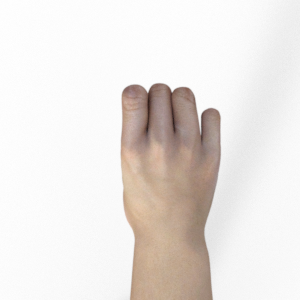

In [7]:
rock = list(data_dir.glob('rock/*'))
PIL.Image.open(str(rock[1]))

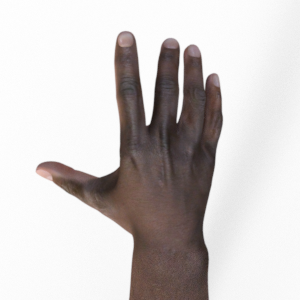

In [8]:
paper = list(data_dir.glob('paper/*'))
PIL.Image.open(str(paper[1]))

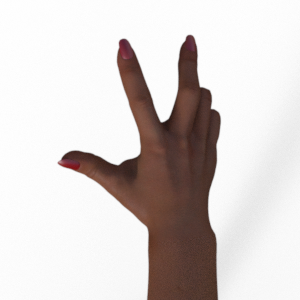

In [9]:
scissors = list(data_dir.glob('scissors/*'))
PIL.Image.open(str(scissors[1]))

In [10]:
#define size image
IMG_WIDTH = 300
IMG_HEIGHT = 300
batch_size = 5

In [11]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder,
    shuffle=True,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 2520 files belonging to 3 classes.


In [12]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_folder,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
)

Found 372 files belonging to 3 classes.


In [13]:
class_names = train_dataset.class_names
print(class_names)

['paper', 'rock', 'scissors']


In [14]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  break
print('batch, height, widht, rgb')

(5, 300, 300, 3)
batch, height, widht, rgb


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
class_names = train_dataset.class_names
print(class_names)

['paper', 'rock', 'scissors']


In [17]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  break
print('batch, height, widht, rgb')

(5, 300, 300, 3)
batch, height, widht, rgb


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [20]:
normalized_dataset = train_dataset.map(lambda x, y : (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch

print(np.min(first_image), np.max(first_image))


0.050980397 1.0


In [21]:
num_classes = 3
model = Sequential([
                    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [24]:
epochs = 30
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=epochs
                    )

Epoch 1/30
504/504 [==============================] - 40s 69ms/step - loss: 125.2977 - accuracy: 0.7894 - val_loss: 1.3940 - val_accuracy: 0.5806
Epoch 2/30
504/504 [==============================] - 28s 56ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 1.6058 - val_accuracy: 0.6667
Epoch 3/30
504/504 [==============================] - 28s 56ms/step - loss: 6.6699e-05 - accuracy: 1.0000 - val_loss: 1.6443 - val_accuracy: 0.6747
Epoch 4/30
504/504 [==============================] - 29s 57ms/step - loss: 2.9645e-05 - accuracy: 1.0000 - val_loss: 1.6888 - val_accuracy: 0.6694
Epoch 5/30
504/504 [==============================] - 29s 58ms/step - loss: 1.8135e-05 - accuracy: 1.0000 - val_loss: 1.7169 - val_accuracy: 0.7016
Epoch 6/30
504/504 [==============================] - 28s 56ms/step - loss: 1.0211e-05 - accuracy: 1.0000 - val_loss: 1.7647 - val_accuracy: 0.6935
Epoch 7/30
504/504 [==============================] - 28s 56ms/step - loss: 6.5806e-06 - accuracy: 1.0000 - val_loss: 

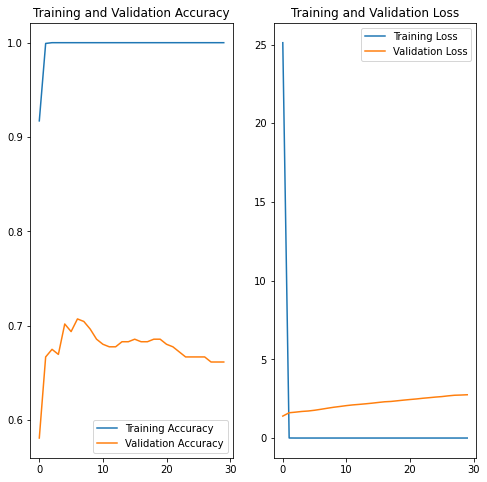

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

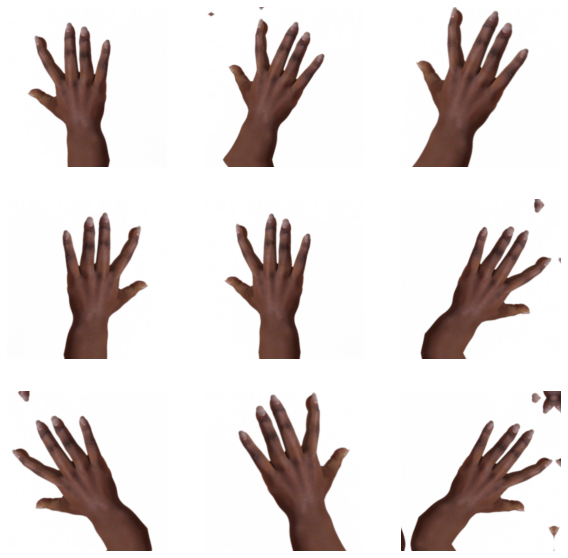

In [27]:
for image, _ in train_dataset.take(1) :
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


In [28]:
num_classes = 3
model_aug = Sequential([
                    data_augmentation,
                    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
                    layers.Conv2D(16,3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [29]:
model_aug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 300, 300, 3)       0         
_________________________________________________________________
input_2 (InputLayer)         multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)       

In [30]:
model_aug.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
epochs = 10
history_aug = model_aug.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=epochs
                    )

Epoch 1/10
504/504 [==============================] - 34s 67ms/step - loss: 0.6213 - accuracy: 0.7548 - val_loss: 0.6206 - val_accuracy: 0.7392
Epoch 2/10
504/504 [==============================] - 30s 59ms/step - loss: 0.4030 - accuracy: 0.8651 - val_loss: 0.8877 - val_accuracy: 0.7204
Epoch 3/10
504/504 [==============================] - 30s 59ms/step - loss: 0.5403 - accuracy: 0.7833 - val_loss: 1.0426 - val_accuracy: 0.5995
Epoch 4/10
504/504 [==============================] - 30s 60ms/step - loss: 0.6394 - accuracy: 0.7325 - val_loss: 0.8017 - val_accuracy: 0.6532
Epoch 5/10
504/504 [==============================] - 30s 59ms/step - loss: 0.3811 - accuracy: 0.8663 - val_loss: 0.7642 - val_accuracy: 0.6855
Epoch 6/10
504/504 [==============================] - 31s 61ms/step - loss: 0.6744 - accuracy: 0.7095 - val_loss: 0.7971 - val_accuracy: 0.6317
Epoch 7/10
504/504 [==============================] - 30s 59ms/step - loss: 0.4241 - accuracy: 0.8468 - val_loss: 0.7439 - val_accuracy:

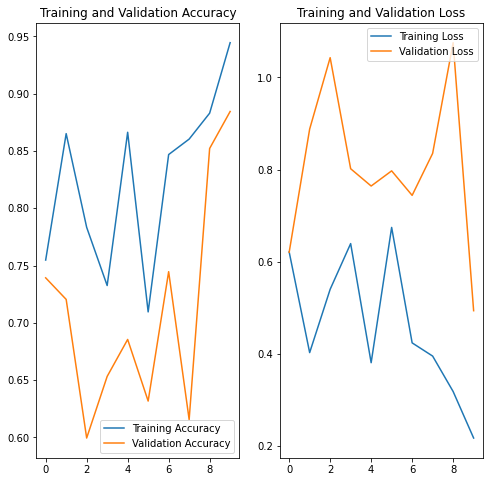

In [33]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']

loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
#Prediction
test_image = "/content/rock7.png"

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

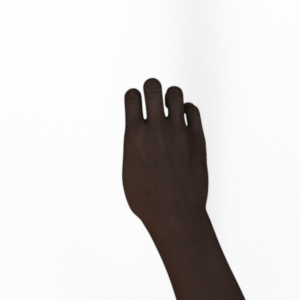

In [56]:
PIL.Image.open(test_image)

In [57]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to rock with a 100.00 percent confidence.


In [58]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_aug.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to rock with a 99.99 percent confidence.


In [59]:
model.save("model_rps", save_format="h5")
model_aug.save("model_aug_rps.h5")

In [62]:
!zip -r 'model_aug_rps.zip' 'model_aug_rps.h5'

updating: model_aug_rps.h5 (deflated 31%)
